# Electron Cross Section

> Lennon+ 1988

For each species investigated, the recommended cross section has been fitted by the following equation

$$
\sigma ( E ) = \frac { 1 } { I E } \left[ A \ln \left( \frac { E } { I } \right) + \sum _ { i = 1 } ^ { N } B _ { i } \left( 1 - \frac { I } { E } \right)^i \right]
$$

where $E$ is the incident electron energy, $I$ is the ionization potential, and the coefficients $B_i$ are determined by a least-squares fitting procedure

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigma(E, I, A, *B):
    i = 1
    sig = A*np.log(E/I)/I/E
    for Bi in B:
        sig += Bi/I/E*(1-I/E)**i
        i += 1
    return(sig*1e-13)

def coefficient(E, I, A, *B):
    return(sigma(E, I, A, *B)*np.sqrt(E*1.6021773e-12*2/9.10938356e-28))

# Fluorine

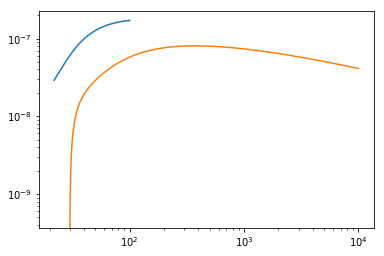

In [3]:
Fx = np.logspace(np.log10(17.4)+0.1, 2, 500)
Fy = coefficient(Fx, 17.4, 2.790, 0.469, -12.900, 26.260, -13.430)
plt.loglog(Fx, Fy)
Fx = np.logspace(np.log10(17.4)+0.1, 4, 500)
Fz = coefficient(Fx, 30.0 , 3.925 ,-0.947 ,-5.688 , 4.911 , -0.083, -0.160)
plt.loglog(Fx, Fz)
plt.show()

# Neon

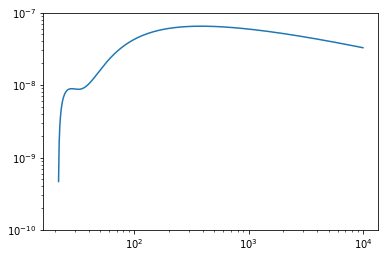

In [4]:
Fx = np.logspace(np.log10(21.7), 4, 500)
Fy = coefficient(Fx, 21.6 , 2.192 , -0.447, -7.006, 5.927)
plt.loglog(Fx, Fy)
plt.ylim(1e-10,1e-7)
plt.show()

Here we consider the ratio of each cross section at 50 eV, which is a typical energy of a secondary electron (the dependence of this ratio on energy is small according to Maloney+ 1996). 

In [5]:
H = sigma(50, 13.6, 0.185, -0.019, 0.123, -0.190, 0.953)
He = sigma(50, 24.6, 0.572,- 0.344, - 0.523, 3.445, - 6.821,  5.578)
C = sigma(50, 11.3, 2.114, -1.965, -0.608)
N = sigma(50, 14.5, 2.265, -1.710, -2.322, 1.732)
O = sigma(50, 13.6, 2.455, -2.181, -1.570)
Mg = sigma(50, 7.60, 0.484, 1.750, - 1.562, 3.787)
print('He/H=', He/H)
print('C/H=', C/H)
print('N/H=', N/H)
print('O/H=', O/H)
print('Mg/H=', Mg/H)

He/H= 0.3204728571969797
C/H= 3.11361486414008
N/H= 2.0028570095656733
O/H= 1.5956962140327202
Mg/H= 13.172565985638398
